In [1]:
import numpy as np
import random
import time
import sys
import matplotlib.pyplot as plt

# Numpy vs Python vanilla

In [2]:
X = [random.random() for _ in range(1000000)]
W = [random.random() for _ in range(1000000)]

# Simulate a simple operation on large lists
start_time = time.perf_counter()
result = 0
for i in range(1000000):
    result += X[i] * W[i]
end_time = time.perf_counter() - start_time
print(f"Time taken for list operation: {end_time:.4f} seconds")
print(f"Result: {result}")

Time taken for list operation: 0.0660 seconds
Result: 250294.1760224381


In [3]:
X_np = np.array(X)
W_np = np.array(W)

# Simulate a simple operation on large lists
start_time = time.perf_counter()
result_np = np.dot(X_np, W_np)
end_time_np = time.perf_counter() - start_time
print(f"Time taken for numpy operation: {end_time_np:.4f} seconds")
print(f"Result: {result_np}")

# Compare memory usage
print(f"Memory usage of list: {sys.getsizeof(X) + sys.getsizeof(W)} bytes")
print(f"Memory usage of numpy array: {X_np.nbytes + W_np.nbytes} bytes")

# Compare performance
print(f"Numpy is {end_time / end_time_np:.2f} times faster than list operations.")

Time taken for numpy operation: 0.0010 seconds
Result: 250294.1760224289
Memory usage of list: 16897456 bytes
Memory usage of numpy array: 16000000 bytes
Numpy is 63.47 times faster than list operations.


# Logistic Regression from scratch vs Sklearn implementation

### Data

In [4]:
# Data
np.random.seed(0)
N = 100  # samples per class
D = 2    # features

# Class 0
X0 = np.random.randn(N, D)
y0 = np.zeros((N, 1))

# Class 1
X1 = np.random.randn(N, D) + np.array([3, 3])
y1 = np.ones((N, 1))

# Combine
X = np.vstack((X0, X1))   # shape: (200, 2)
y = np.vstack((y0, y1))   # shape: (200, 1)

### Scratch

Epoch 0, Loss: 0.6931


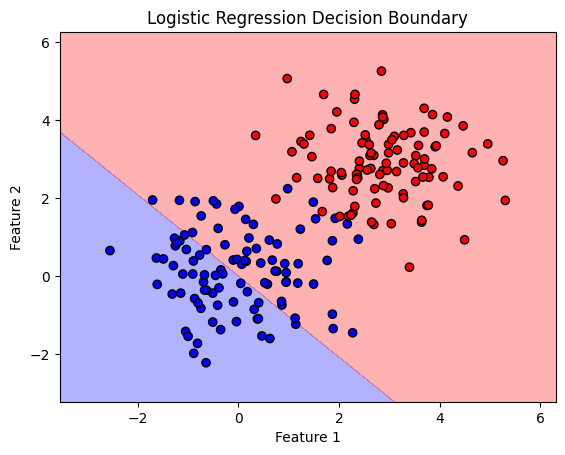

Epoch 10, Loss: 0.4259


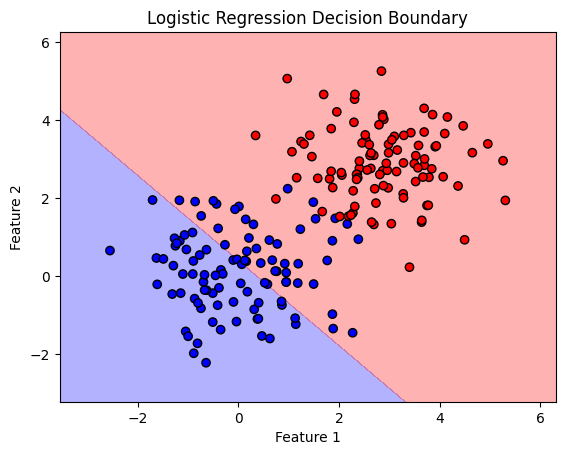

Epoch 20, Loss: 0.3749


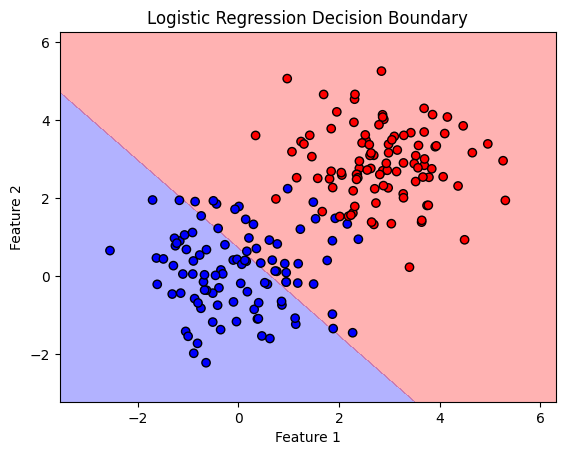

Epoch 30, Loss: 0.3402


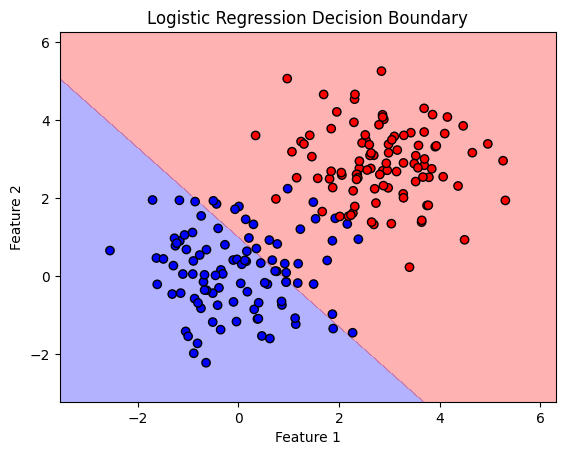

Epoch 40, Loss: 0.3126


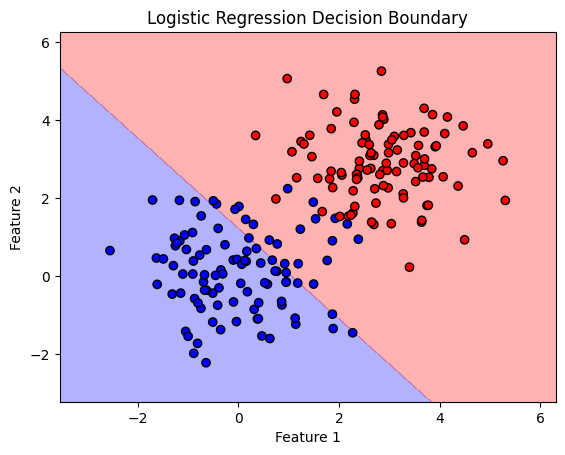

Epoch 50, Loss: 0.2900


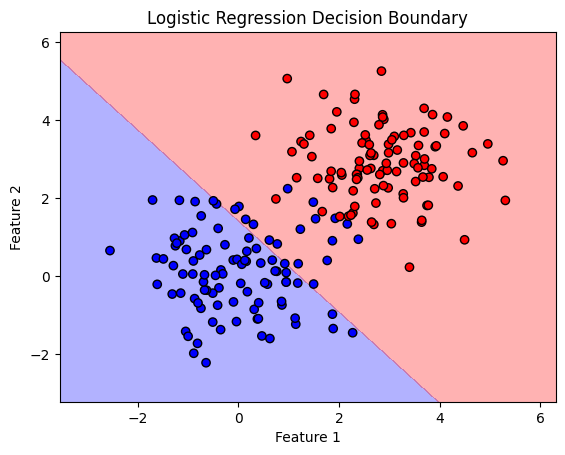

Epoch 60, Loss: 0.2710


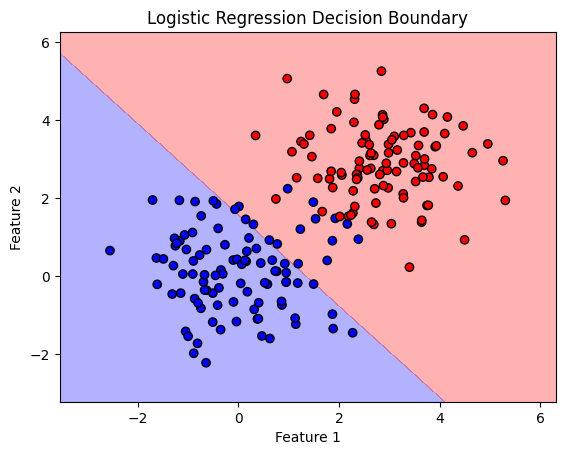

Epoch 70, Loss: 0.2549


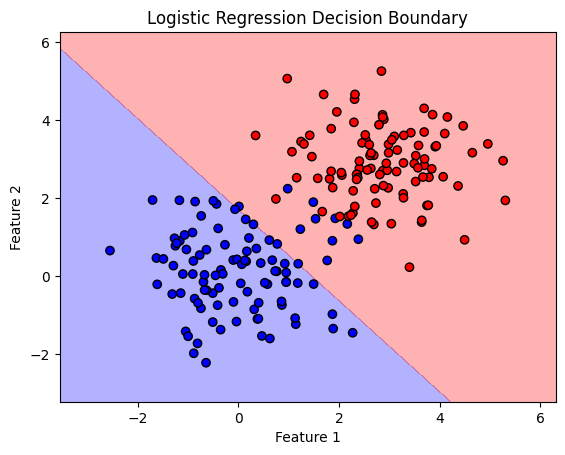

Epoch 80, Loss: 0.2411


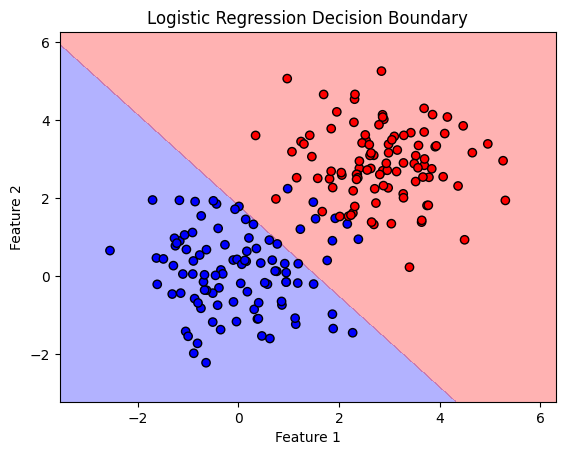

Epoch 90, Loss: 0.2291


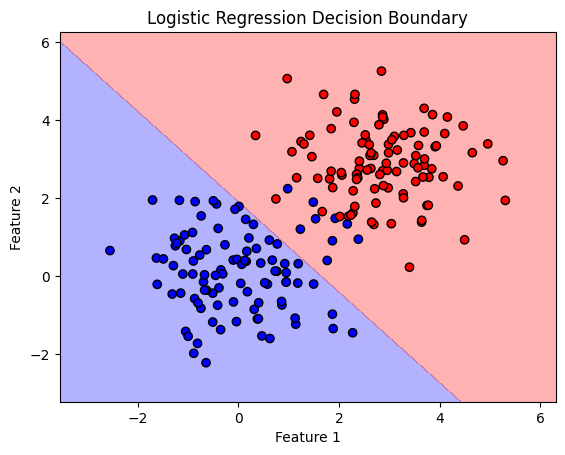

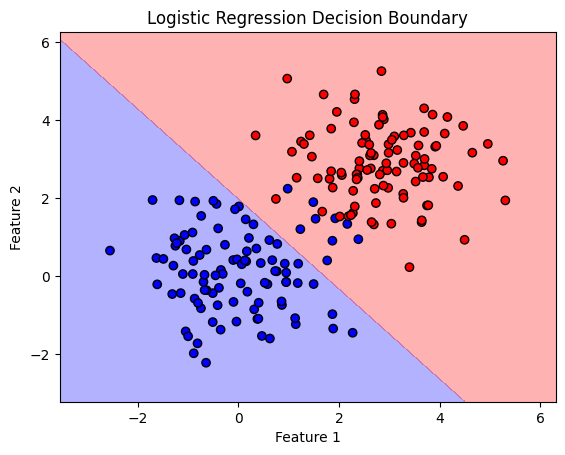

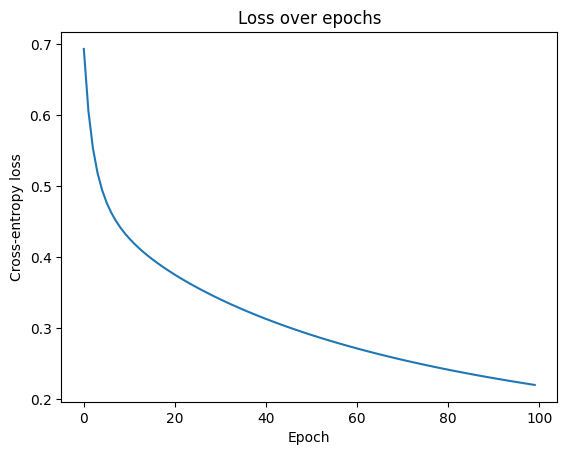

In [5]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function: Binary cross-entropy
def compute_loss(y_true, y_pred):
    epsilon = 1e-8  # to avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Plot decision boundary
def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ w + b).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k')
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Training function
def train_logistic_regression(X, y, lr=0.1, epochs=100):
    n_samples, n_features = X.shape
    # Initialize weights and bias
    w = np.zeros((n_features, 1))
    b = 0

    loss_history = []

    for epoch in range(epochs):
        # Linear combination
        z = np.dot(X, w) + b

        # Sigmoid activation
        y_pred = sigmoid(z)

        # Compute loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        # Update weights
        w -= lr * dw # L2 regularization can be added here if needed
        b -= lr * db

        # Print every 100 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
            plot_decision_boundary(X, y, w, b)

    return w, b, loss_history

# Train the model
w, b, loss_history = train_logistic_regression(X, y)

# 6. Prediction function
def predict(X, w, b):
    proba = sigmoid(np.dot(X, w) + b)
    return (proba >= 0.5).astype(int)

plot_decision_boundary(X, y, w, b)

# 8. Plot loss
plt.plot(loss_history)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")
plt.show()


### Sklearn

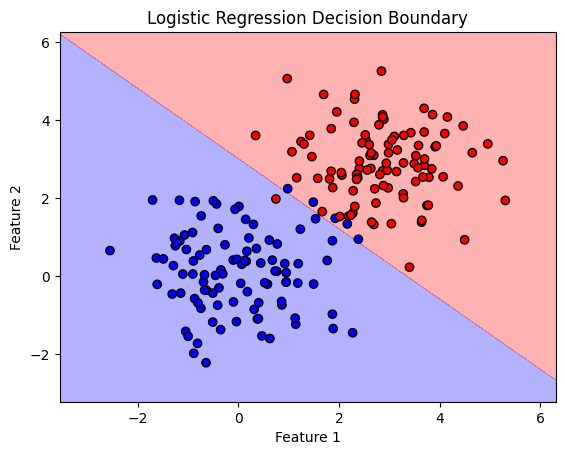

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

# Train using sklearn's LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X, y.ravel())  # Flatten y to 1D array


# Plot decision boundary
def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ w + b).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k')
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

predicted_w = model.coef_.T
predicted_b = model.intercept_[0]

# Plot decision boundary using sklearn's model
plot_decision_boundary(X, y, predicted_w, predicted_b)
